## Importing libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Importing the dataset files

In [2]:
#Depending on the person that was working it was necessary to adapt the working directory

#Rodrigo
url = "C:\\Users\\rodri\\OneDrive - ISEG\\iseg 22092021\\Iseg\\Master\\2semester\\Big Data Tools and Analytics\\data\\city_temperature.csv"
#Joao
#url = "C:\\Users\\joaod\\Desktop\\Big Data Tools\\Group Project\\city_temperature.csv"
#Rosanna
#url = "C:\\Users\\Rosan\\OneDrive - ISEG\\2 BDTA_Big Data Tools and Analytics\\Group Project\\Project Data\\city_temperature.csv"

temperature = pd.read_csv(url)

#Rodrigo
url2="C:\\Users\\rodri\\OneDrive - ISEG\\iseg 22092021\\Iseg\\Master\\2semester\\Big Data Tools and Analytics\\data\\co2_data.csv"
#Joao
#url2 = "C:\\Users\\joaod\\Desktop\\Big Data Tools\\Group Project\\co2_data.csv"
#Rosanna
#url2 = "C:\\Users\\Rosan\\OneDrive - ISEG\\2 BDTA_Big Data Tools and Analytics\\Group Project\\Project Data\\co2_data.csv"

co2 = pd.read_csv(url2)

C:\Users\rodri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Data cleansing

In [3]:
temperature= temperature.drop(columns=["State","Month", "Day"]) #dropping unnecessary columns
temperature = temperature[temperature["AvgTemperature"] != -99] #they put -99 for rows without info
temperature = temperature[temperature["Year"] < 2020] # there are very few rows available for 2020 onwards

temperatureYear= temperature.groupby(['Year']) #grouping temperature by year
Temp=temperatureYear["AvgTemperature"].mean().reset_index() #averging values for each year

new_co2 = co2[["country", "year", "co2", "nitrous_oxide", "methane"]].dropna()
new_co2 = new_co2[new_co2["year"]==2016]
new_co2 = new_co2[new_co2["country"]!="World"]
new_co2 = new_co2[new_co2["country"]!="EU-27"]
new_co2.drop(columns=["year"])
new_co2 = new_co2.groupby("country")
new_co2 = new_co2.mean().reset_index()

co2_big = co2[["iso_code","country","year","co2","consumption_co2", "co2_growth_prct","co2_growth_abs","co2_per_capita","energy_per_capita", "gdp", "population", "cement_co2", "coal_co2", "flaring_co2", "gas_co2", "oil_co2", "other_industry_co2"]]
co2_big["id"] = co2_big.index
co2_big = co2_big.set_index("id")

co2= co2[["iso_code","country","year","co2","consumption_co2","co2_growth_prct","co2_growth_abs","co2_per_capita","gdp", "population"]]
co2["id"] = co2.index
co2=co2.set_index("id")
co2_country= co2.groupby("country")
co2_year = co2.groupby(["year"]) #grouping co2 by year
co2_overall = co2_year["co2"].mean().reset_index() #averaging values for each year

co2_95 = co2[co2["year"]>1994]
co2_95 = co2_95[co2_95["year"]<2020].groupby(["year"]) #matching co2 year range with the climate year range
co2_95_overall = co2_95["co2"].mean().reset_index() #averaging values for each year
co2Abs= co2_country.mean().reset_index()

C:\Users\rodri\AppData\Local\Temp/ipykernel_1284/2776607778.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  co2_big["id"] = co2_big.index


In [4]:
#Implementing a function to hide text
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
hide_toggle()

## Answering questions

### Question 1: How is the average temperature of the world changing over time and how steep is the temperature increase?

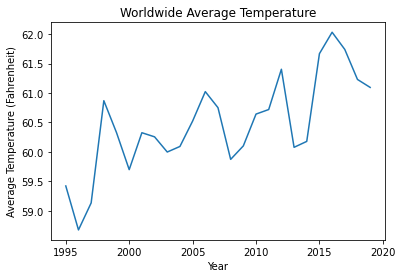

In [5]:
plt.plot(Temp.Year, Temp.AvgTemperature)
plt.xlabel('Year')
plt.ylabel('Average Temperature (Fahrenheit)')
plt.title('Worldwide Average Temperature')
plt.show()

hide_toggle()

### Question 2: How are the Co2 emissions of the world changing over time and how steep is the emission increase/decrease

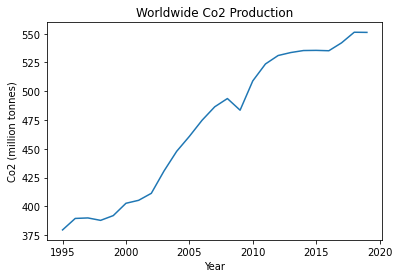

In [6]:
plt.plot(co2_95_overall.year, co2_95_overall.co2)
plt.xlabel('Year')
plt.ylabel('Co2 (million tonnes)')
plt.title('Worldwide Co2 Production')
plt.show()

hide_toggle()

### Question 3: Which years had record temperatures? Are there also record Co2 emissions in those years?

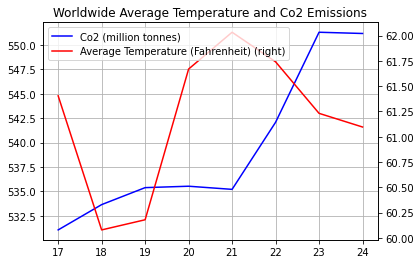

In [7]:
#find years with highest values for co2 and temperature
co2_years = co2_95_overall.sort_values(by = "co2", ascending = False).head(10)
temp_years = Temp.sort_values(by = "AvgTemperature", ascending = False).head(10)

#filtering only the years after 2012
co2_largest = co2_95_overall[co2_95_overall["year"]>2011]
temp_largest = Temp[Temp["Year"]>2011]

ax1 = co2_largest.co2.plot(color='blue', grid=True, label='Co2 (million tonnes)')
ax2 = temp_largest.AvgTemperature.plot(color='red', grid=True, secondary_y=True, label='Average Temperature (Fahrenheit)')
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
plt.legend(h1+h2, l1+l2, loc=2)
plt.xlabel('Year')
plt.title("Worldwide Average Temperature and Co2 Emissions")
plt.show()

hide_toggle()

### Question 4: Which countries are making more effort to reduce Co2 emissions and which countries are making the least effort?

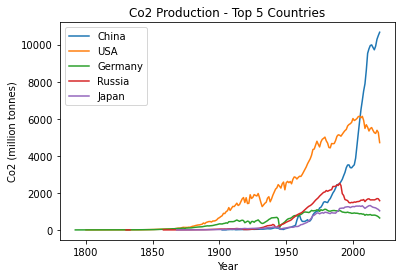

In [8]:
#Find the countries with the highest values for co2

co2Abs.sort_values(by = "co2", ascending = False).head(20)

#Create a data frame for the top 5 countries
co2AbsChina= co2[co2["country"]== "China"]
co2AbsUsa= co2[co2["country"]== "United States"]
co2AbsGermany= co2[co2["country"]== "Germany"]
co2AbsRussia= co2[co2["country"]== "Russia"]
co2AbsJapan= co2[co2["country"]== "Japan"]

#Creating a plot for top 5 country
plt.plot(co2AbsChina.year, co2AbsChina.co2, label = "China")
plt.plot(co2AbsUsa.year, co2AbsUsa.co2, label = "USA")
plt.plot(co2AbsGermany.year, co2AbsGermany.co2, label = "Germany")
plt.plot(co2AbsRussia.year, co2AbsRussia.co2, label = "Russia")
plt.plot(co2AbsJapan.year, co2AbsJapan.co2, label = "Japan")
plt.xlabel('Year')
plt.ylabel('Co2 (million tonnes)')
plt.title("Co2 Production - Top 5 Countries")
plt.legend()
plt.show()

hide_toggle()

### Question 5: Which countries have the highest GDP overall and how has it been evolving? Do they coincide with the countries that pollute the most?

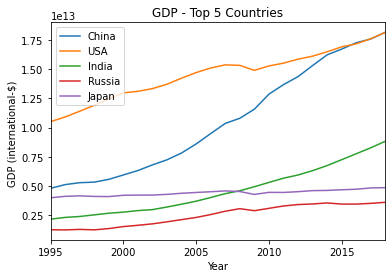

In [12]:
co2GDPChina= co2[co2["country"]== "China"]
co2GDPChina = co2GDPChina[co2GDPChina["year"]>1994].dropna()

co2GDPUsa= co2[co2["country"]== "United States"]
co2GDPUsa = co2GDPUsa[co2GDPUsa["year"]>1994].dropna()

co2GDPIndia= co2[co2["country"]== "India"]
co2GDPIndia = co2GDPIndia[co2GDPIndia["year"]>1994].dropna()

co2GDPRussia= co2[co2["country"]== "Russia"]
co2GDPRussia = co2GDPRussia[co2GDPRussia["year"]>1994].dropna()

co2GDPJapan= co2[co2["country"]== "Japan"]
co2GDPJapan = co2GDPJapan[co2GDPJapan["year"]>1994].dropna()

plt.plot(co2GDPJapan.year, co2GDPChina.gdp, label = "China")
plt.plot(co2GDPJapan.year, co2GDPUsa.gdp, label = "USA")
plt.plot(co2GDPJapan.year, co2GDPIndia.gdp, label = "India")
plt.plot(co2GDPJapan.year, co2GDPRussia.gdp, label = "Russia")
plt.plot(co2GDPJapan.year, co2GDPJapan.gdp, label = "Japan")
plt.xlabel('Year')
plt.ylabel('GDP (international-$) ')
plt.title("GDP - Top 5 Countries")
plt.legend()
plt.xlim([1995, 2018])
plt.show()

hide_toggle()

### Question 6: How does the Co2 emissions relate with the temperature changes? Is there a relation?

C:\Users\rodri\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
No handles with labels found to put in legend.


                            OLS Regression Results                            
Dep. Variable:         AvgTemperature   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     20.38
Date:                Sun, 08 May 2022   Prob (F-statistic):           0.000156
Time:                        11:23:45   Log-Likelihood:                -21.859
No. Observations:                  25   AIC:                             47.72
Df Residuals:                      23   BIC:                             50.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.2485      0.944     59.591      0.0

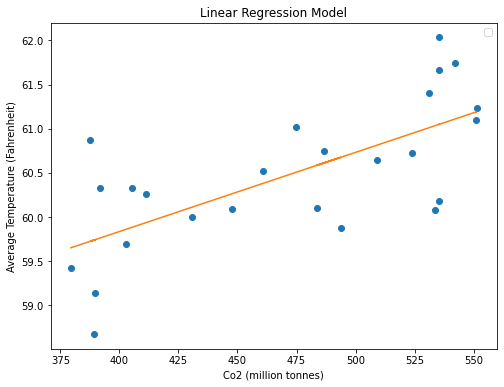

In [9]:
# Fit a linear regression model and calculate the R-square
x = co2_95_overall["co2"] #co2 as independent variable
y = Temp["AvgTemperature"] #temperature as dependent variable

x1 = sm.add_constant(x)
model = sm.OLS(y, x1)
result = model.fit()
z = result.predict(x1)
print(result.summary())

# Plot linear regression model and effective data
fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel('Co2 (million tonnes)')
plt.ylabel('Average Temperature (Fahrenheit)')
plt.title('Linear Regression Model')
ax.plot(x, y, "o")
ax.plot(x, z, "-")
plt.legend()
plt.show()

hide_toggle()

### Question 7: Are the countries with the highest temperature increase, the countries which pollute most?

C:\Users\rodri\AppData\Local\Temp/ipykernel_1284/1512443176.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp_country["Temp_growth"][i] = (Temp_country["AvgTemperature"][i] - Temp_country["AvgTemperature"][i-1])/100
C:\Users\rodri\AppData\Local\Temp/ipykernel_1284/1512443176.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp_country["Temp_growth"][i]= np.nan
C:\Users\rodri\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

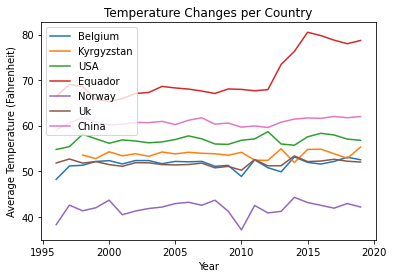

In [10]:
#group the temperature by country and year
temperature_year_country=temperature.groupby(['Year','Country'])

#getting the average temperature for each key
Temp_country=temperature_year_country["AvgTemperature"].mean().reset_index()

#sort the values 
Temp_country= Temp_country.sort_values(by=["Country","Year"])

#Create a new index to replace
Index=[]
for i in range(len(Temp_country["Year"])):
    Index.append(i)

#Adding the index to new data frame   
Temp_country["Index"]= Index
Temp_country=Temp_country.set_index("Index")

#create a new column with empty values
Temp_growth=[]
for i in range(len(Temp_country["Year"])):
    Temp_growth.append(0)
Temp_country["Temp_growth"]= Temp_growth    
    
#Create loop to add temperature growth column
for i in range(1, len(Temp_country)):
    if i == 0:
        Temp_country["Temp_growth"][i]= np.nan
        continue
    if Temp_country["Country"][i] == Temp_country["Country"][i-1]:
        Temp_country["Temp_growth"][i] = (Temp_country["AvgTemperature"][i] - Temp_country["AvgTemperature"][i-1])/100
    else:
        Temp_country["Temp_growth"][i]= np.nan


#Gets rid of the nan created purposely
Temp_country= Temp_country.dropna()
Temp_country= Temp_country.drop(0, axis = 0)

#Gives the biggest temperature growth changes that happened.
Temp_country.sort_values(by= "Temp_growth", ascending= False).head(30)

#Creating objects for the countries with the biggest changes in last years
AvgBelgium=Temp_country[Temp_country["Country"]== "Belgium"]
AvgCyprus= Temp_country[Temp_country["Country"]== "Cyprus"]
AvgKyrgyzstan= Temp_country[Temp_country["Country"]== "Kyrgyzstan"]
AvgUnited_States= Temp_country[Temp_country["Country"]== "US"]
AvgEquador= Temp_country[Temp_country["Country"]== "Equador"]
AvgNorway= Temp_country[Temp_country["Country"]== "Norway"]
AvgUK= Temp_country[Temp_country["Country"]== "United Kingdom"]
AvgChina = Temp_country[Temp_country["Country"]== "China"]

plt.plot(AvgBelgium.Year, AvgBelgium.AvgTemperature, label = "Belgium")
plt.plot(AvgKyrgyzstan.Year, AvgKyrgyzstan.AvgTemperature, label ="Kyrgyzstan")
plt.plot(AvgUnited_States.Year, AvgUnited_States.AvgTemperature, label= "USA")
plt.plot(AvgEquador.Year, AvgEquador.AvgTemperature, label ="Equador")
plt.plot(AvgNorway.Year, AvgNorway.AvgTemperature, label = "Norway")
plt.plot(AvgUK.Year, AvgUK.AvgTemperature, label = "Uk")
plt.plot(AvgChina.Year, AvgChina.AvgTemperature, label= "China")
plt.xlabel('Year')
plt.ylabel('Average Temperature (Fahrenheit)')
plt.title("Temperature Changes per Country")
plt.legend(loc=2)
plt.show()

hide_toggle()

### Question 8: Do the countries that emit the most Co2 overall, coincide with the countries that emit the most Co2 per capita?

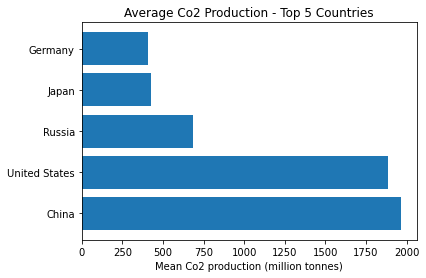

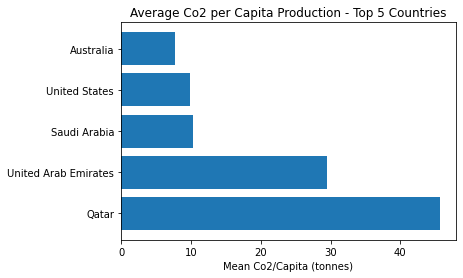

In [11]:
# Create a dataframe with top 5 countries for average co2 production over all years
co2_top20 = co2Abs.sort_values(by = "co2", ascending = False).head(20)
co2_top5Countries = ["China", "United States", "Germany", "Russia", "Japan"]

df_co2_top5Countries = co2_top20[co2_top20.country.isin(co2_top5Countries)]

# Create a dataframe with top 5 countries for average co2/capita over all years
co2pCapita_top30 = co2Abs.sort_values(by = "co2_per_capita", ascending = False).head(30)
co2pCapita_top5Countries = ["Qatar", "United Arab Emirates", "Saudi Arabia", "United States", "Australia"]

df_co2pCapita_top5Countries = co2pCapita_top30[co2pCapita_top30.country.isin(co2pCapita_top5Countries)]

# Plot bar chart for top 5 Countries of co2
plt.barh(df_co2_top5Countries.country, df_co2_top5Countries.co2)
plt.xlabel('Mean Co2 production (million tonnes)')
plt.title("Average Co2 Production - Top 5 Countries")
plt.show()

# Plot bar chart for top 5 Countries of co2 per Capita
plt.barh(df_co2pCapita_top5Countries.country, df_co2pCapita_top5Countries.co2_per_capita)
plt.xlabel('Mean Co2/Capita (tonnes)')
plt.title("Average Co2 per Capita Production - Top 5 Countries")
plt.show()

hide_toggle()

### Question 9: Which countries pollute the most and which countries pollute the least?
### How is this changing over time?

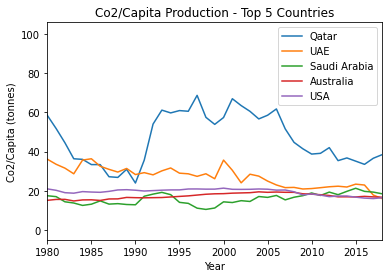

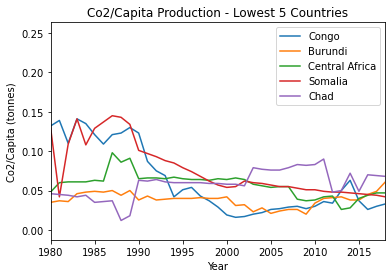

In [13]:
#5largest: Qatar, United Arab Emirates, Saudi Arabia, Australia, United States
#Create a data frame for the upper 5 countries
co2_Q= co2[co2["country"]== "Qatar"]
co2_UAE= co2[co2["country"]== "United Arab Emirates"]
co2_SA= co2[co2["country"]== "Saudi Arabia"]
co2_AUS= co2[co2["country"]== "Australia"]
co2_USA= co2[co2["country"]== "United States"]
#Creating a plot for top 5 country
plt.plot(co2_Q.year, co2_Q.co2_per_capita, label = "Qatar")
plt.plot(co2_UAE.year, co2_UAE.co2_per_capita, label = "UAE")
plt.plot(co2_SA.year, co2_SA.co2_per_capita, label = "Saudi Arabia")
plt.plot(co2_AUS.year, co2_AUS.co2_per_capita, label = "Australia")
plt.plot(co2_USA.year, co2_USA.co2_per_capita, label = "USA")
plt.xlabel('Year')
plt.ylabel('Co2/Capita (tonnes)')
plt.title("Co2/Capita Production - Top 5 Countries")
plt.legend()
plt.xlim([1980, 2018])
plt.show()


#5smallest: Democratic Republic of Congo, Burundi, Central African Republic, Somalia, Chad
#Create a data frame for the lower 5 countries
co2_DRC= co2[co2["country"]== "Democratic Republic of Congo"]
co2_B= co2[co2["country"]== "Burundi"]
co2_CAR= co2[co2["country"]== "Central African Republic"]
co2_S= co2[co2["country"]== "Somalia"]
co2_C= co2[co2["country"]== "Chad"]
#Creating a plot for lowest 5 country
plt.plot(co2_DRC.year, co2_DRC.co2_per_capita, label = "Congo")
plt.plot(co2_B.year, co2_B.co2_per_capita, label = "Burundi")
plt.plot(co2_CAR.year, co2_CAR.co2_per_capita, label = "Central Africa")
plt.plot(co2_S.year, co2_S.co2_per_capita, label = "Somalia")
plt.plot(co2_C.year, co2_C.co2_per_capita, label = "Chad")
plt.xlabel('Year')
plt.ylabel('Co2/Capita (tonnes)')
plt.title("Co2/Capita Production - Lowest 5 Countries")
plt.legend()
plt.xlim([1980, 2018])
plt.show()

hide_toggle()

### Question 10: Which countries emit the most CO2 per industry in 2019?

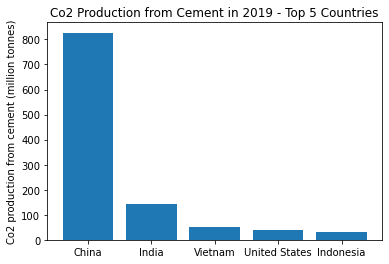

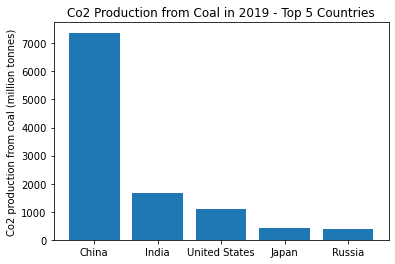

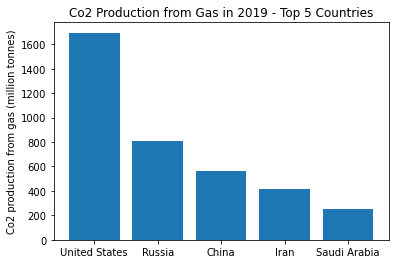

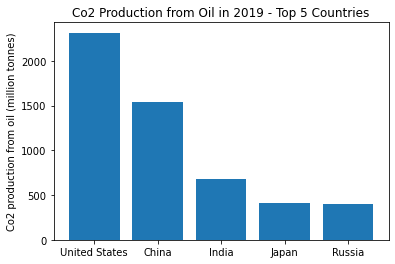

In [14]:
co2_big_2019 = co2_big[co2_big["year"] == 2019]

# Bar chart for top 5 countries in industry "cement"
co2_cement_top30 = co2_big_2019.sort_values(by = "cement_co2", ascending = False).head(30)
co2_cement_top5 = ["China", "India", "Vietnam", "United States", "Indonesia"]

df_co2_cement_top5 = co2_cement_top30[co2_cement_top30.country.isin(co2_cement_top5)]

plt.bar(df_co2_cement_top5.country, df_co2_cement_top5.cement_co2)
plt.ylabel('Co2 production from cement (million tonnes)')
plt.title("Co2 Production from Cement in 2019 - Top 5 Countries")
plt.show()

# Bar chart for top 5 countries in industry "coal"
co2_coal_top30 = co2_big_2019.sort_values(by = "coal_co2", ascending = False).head(30)
co2_coal_top5 = ["China", "India", "United States", "Japan", "Russia"]

df_co2_coal_top5 = co2_coal_top30[co2_coal_top30.country.isin(co2_coal_top5)]

plt.bar(df_co2_coal_top5.country, df_co2_coal_top5.coal_co2)
plt.ylabel('Co2 production from coal (million tonnes)')
plt.title("Co2 Production from Coal in 2019 - Top 5 Countries")
plt.show()

# Bar chart for top 5 countries in industry "gas"
co2_gas_top30 = co2_big_2019.sort_values(by = "gas_co2", ascending = False).head(30)
co2_gas_top5 = ["United States", "Russia", "China", "Iran", "Saudi Arabia"]

df_co2_gas_top5 = co2_gas_top30[co2_gas_top30.country.isin(co2_gas_top5)]

plt.bar(df_co2_gas_top5.country, df_co2_gas_top5.gas_co2)
plt.ylabel('Co2 production from gas (million tonnes)')
plt.title("Co2 Production from Gas in 2019 - Top 5 Countries")
plt.show()

# Bar chart for top 5 countries in industry "oil"
co2_oil_top30 = co2_big_2019.sort_values(by = "oil_co2", ascending = False).head(30)
co2_oil_top5 = ["United States", "China","India", "Japan", "Russia"]

df_co2_oil_top5 = co2_oil_top30[co2_oil_top30.country.isin(co2_oil_top5)]

plt.bar(df_co2_oil_top5.country, df_co2_oil_top5.oil_co2)
plt.ylabel('Co2 production from oil (million tonnes)')
plt.title("Co2 Production from Oil in 2019 - Top 5 Countries")
plt.show()

hide_toggle()

### Question 11: Which countries consume the most energy?
 

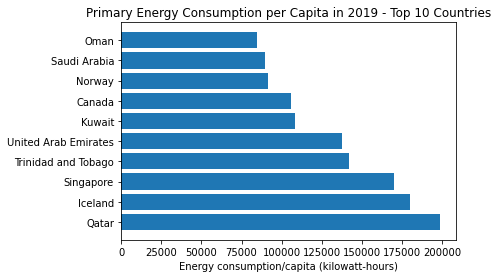

In [15]:
co2_big_2019 = co2_big[co2_big["year"] == 2019]

# Bar chart for top 5 countries in industry "cement"
eneryperCapita_top30 = co2_big_2019.sort_values(by = "energy_per_capita", ascending = False).head(30)
eneryperCapita_top10 = ["Qatar", "Iceland", "Singapore", "Trinidad and Tobago", "United Arab Emirates", "Kuwait", "Canada", "Norway", "Saudi Arabia", "Oman"]


df_eneryperCapita_top10 = eneryperCapita_top30[eneryperCapita_top30.country.isin(eneryperCapita_top10)]

plt.barh(df_eneryperCapita_top10.country, df_eneryperCapita_top10.energy_per_capita)
plt.xlabel('Energy consumption/capita (kilowatt-hours)')
plt.title("Primary Energy Consumption per Capita in 2019 - Top 10 Countries")
plt.show()

hide_toggle()

### Question 12: How much of other kind of gases do other countries emit, such as nitrous oxide or methane?

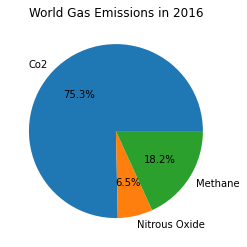

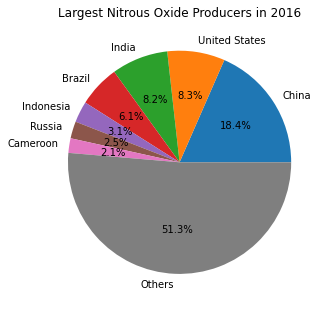

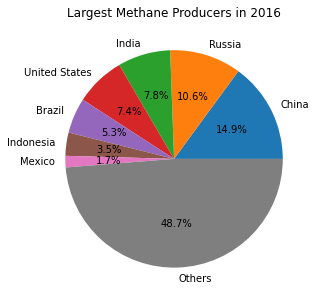

In [16]:
# co2, nitrous_oxide & methane in the world
df = pd.DataFrame({"World":[35452.46, 3054.00, 8550.06]}, index=["Co2", "Nitrous Oxide", "Methane"])
world_pie = df.plot.pie(y="World", title="World Gas Emissions in 2016", legend=False, autopct='%1.1f%%')
world_pie.set_ylabel("")
plt.show()

# highest emitters of nitrous_oxide today
nitrous = new_co2[["country", "nitrous_oxide"]].sort_values(["nitrous_oxide"], ascending = False)
df_nitrous1 = nitrous.head(7)
df_nitrous2 = nitrous["nitrous_oxide"][7:].sum()
new_row = pd.DataFrame(data = {"country": ["Others"], "nitrous_oxide": [df_nitrous2]})
combination = pd.concat([df_nitrous1, new_row])
nitrous_pie = combination["nitrous_oxide"].plot.pie(title="Largest Nitrous Oxide Producers in 2016", labels=combination["country"], autopct='%1.1f%%', figsize=(5,15))
nitrous_pie.set_ylabel("")
plt.show()

#highest emitters of methane
methane = new_co2[["country", "methane"]].sort_values(["methane"], ascending = False)
df_methane1 = methane.head(7)
df_methane2 = methane["methane"][7:].sum()
new_row = pd.DataFrame(data = {"country": ["Others"], "methane": [df_methane2]})
combination = pd.concat([df_methane1, new_row])
methane_pie = combination["methane"].plot.pie(title="Largest Methane Producers in 2016", labels=combination["country"], autopct='%1.1f%%', figsize=(5,5))
methane_pie.set_ylabel("")
plt.show()

hide_toggle()